In [7]:
import csv

def linear_regression(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x_i * y_i for x_i, y_i in zip(x, y))
    sum_x2 = sum(x_i**2 for x_i in x)

    # Slope (m) and Intercept (b)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    b = (sum_y - m * sum_x) / n
    return m, b

def predict(x, m, b):
    return [m * x_i + b for x_i in x]

def mean_squared_error(y_true, y_pred):
    return sum((y_t - y_p)**2 for y_t, y_p in zip(y_true, y_pred)) / len(y_true)

# Load real dataset from CSV
def load_dataset(filepath):
    x, y = [], []
    with open(filepath, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row if any
        for row in reader:
            x.append(float(row[0]))  # Years of Experience
            y.append(float(row[1]))  # Salary
    return x, y

dataset_path = "homeprices1.csv"
x, y = load_dataset(dataset_path)

# Train the model
m, b = linear_regression(x, y)
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Predict
predictions = predict(x, m, b)
print(f"Predictions: {predictions}")

# Evaluate
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")


Slope (m): 135.7876712328767
Intercept (b): 180616.43835616438
Predictions: [533664.3835616438, 587979.4520547944, 615136.9863013698, 669452.0547945205, 723767.1232876712]
Mean Squared Error: 186815068.4931503


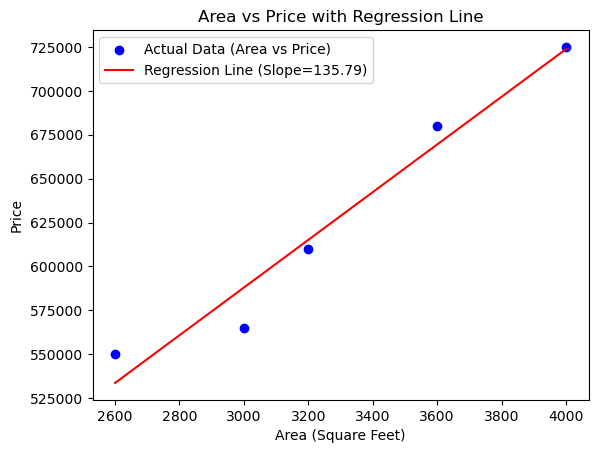

In [9]:
import matplotlib.pyplot as plt
# Visualization
plt.scatter(x, y, color='blue', label='Actual Data (Area vs Price)')
plt.plot(x, predictions, color='red', label=f'Regression Line (Slope={m:.2f})')
plt.title('Area vs Price with Regression Line')
plt.xlabel('Area (Square Feet)')
plt.ylabel('Price')
plt.legend() 
plt.show()